In [1]:
import keras
from keras import backend as K
from keras.layers import Dense, Activation, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.applications import MobileNetV2
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
import os
import cv2
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
mobile = MobileNetV2()

In [3]:
Dataset_dir = './Datasets/facial-recognition-dataset'
train_path = Dataset_dir + '/Training/Training'
test_path = Dataset_dir + '/Testing/Testing'

In [4]:
def prepare_image(img_array):
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [5]:
def resize_image(image, target_size=(224, 224)):
    return cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

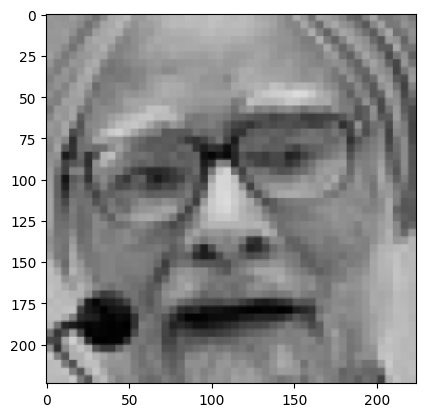

In [6]:
file = os.path.join(train_path, 'Angry/Angry-1.jpg')
img = cv2.imread(file)
img = resize_image(img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
preprocessed = prepare_image(img)
predictions = mobile.predict(preprocessed)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n04356056', 'sunglasses', 0.60907716),
  ('n04355933', 'sunglass', 0.17665853),
  ('n03825788', 'nipple', 0.016936962),
  ('n03544143', 'hourglass', 0.014745769),
  ('n03868863', 'oxygen_mask', 0.012805802)]]

In [8]:
datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 256

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size
)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = keras.models.Sequential(
    [
        base_model,
        GlobalAveragePooling2D(),
        Dense(127, activation='relu'),
        Dense(6, activation='softmax')
    ]
)

model.compile(
    optimizer=Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [10]:
model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
)

Epoch 1/50


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/111 ━━━━━━━━━━━━━━━━━━━━ 4:47:32 160s/step - accuracy: 0.2046 - loss: 2.0013

In [6]:
import torch
import yaml
from pathlib import Path

# Load the YOLOv5 model
model = torch.hub.load("ultralytics/yolov5", "yolov5s", pretrained=True)

# Path to dataset and configuration
data_path = "./data.yaml"

# Load data configuration
with open(data_path, "r") as file:
    data_config = yaml.safe_load(file)

# Set parameters
img_size = 224
batch_size = 16
epochs = 50

# Train the model
model.train(
    data=data_path,
    imgsz=img_size,
    batch_size=batch_size,
    epochs=epochs,
    weights="yolov5s.pt",
)

# Save the trained model
model.save("emotion_classification_model.pt")


Using cache found in C:\Users\Asus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-18 Python-3.12.4 torch-2.3.0+cpu CPU



Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


TypeError: Module.train() got an unexpected keyword argument 'data'